In [1]:
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout,Flatten
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

169001437/169001437 [==============================] - 5s 0us/step


In [3]:
model = Sequential()
model.add(Dense(512, activation='relu',
input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [4]:
model.compile(loss='mean_squared_error',optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size =256, epochs = 200, validation_split = 0.2)

Epoch 1/200
157/157 [==============================] - 13s 72ms/step - loss: 0.0098 - acc: 0.0363 - val_loss: 0.0098 - val_acc: 0.0614
Epoch 2/200
157/157 [==============================] - 14s 90ms/step - loss: 0.0097 - acc: 0.0624 - val_loss: 0.0097 - val_acc: 0.0754
Epoch 3/200
157/157 [==============================] - 12s 76ms/step - loss: 0.0097 - acc: 0.0806 - val_loss: 0.0096 - val_acc: 0.1043
Epoch 4/200
157/157 [==============================] - 12s 76ms/step - loss: 0.0096 - acc: 0.1006 - val_loss: 0.0095 - val_acc: 0.1080
Epoch 5/200
157/157 [==============================] - 12s 74ms/step - loss: 0.0095 - acc: 0.1113 - val_loss: 0.0095 - val_acc: 0.1271
Epoch 6/200
157/157 [==============================] - 12s 75ms/step - loss: 0.0095 - acc: 0.1229 - val_loss: 0.0094 - val_acc: 0.1302
Epoch 7/200
157/157 [==============================] - 12s 74ms/step - loss: 0.0094 - acc: 0.1313 - val_loss: 0.0094 - val_acc: 0.1393
Epoch 8/200
157/157 [==============================] - 

In [5]:
model.save('cifar100.h5')

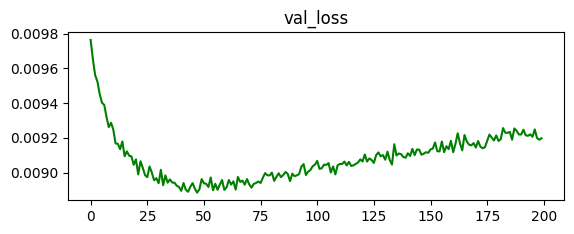

In [6]:
plt.subplot(211)
plt.title('val_loss')
plt.plot(history.history['val_loss'], color='green',
label='train')

1/1 [==============================] - 0s 460ms/step


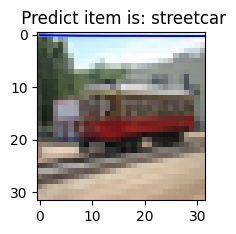

In [7]:
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='blue',
label='train')
test =12
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']
plt.title(" Predict item is: " +
str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test],cmap=plt.get_cmap('gray'))